In [10]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define constants
IMG_WIDTH, IMG_HEIGHT = 64, 64
person_folders = ['person1', 'person2']  # Add more folder names as needed
NUM_CLASSES = len(person_folders)

# Load the images and labels
X_data = []
y_data = []

for i, folder in enumerate(person_folders):
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
        X_data.append(img)
        y_data.append(i)  # Assign label based on the folder index

# Convert lists to numpy arrays
X_data = np.array(X_data)
y_data = np.array(y_data)

# Normalize pixel values to range [0, 1]
X_data = X_data.astype('float32') / 255.0

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history=model.fit(X_data, y_data, epochs=10, batch_size=32)

# Save the trained model
model.save('face_recognition_cnn_model.h5')


Epoch 1/10
5/5 [==============================] - 1s 45ms/step - loss: 0.5837 - accuracy: 0.5972
Epoch 2/10
5/5 [==============================] - 0s 43ms/step - loss: 0.1764 - accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 0s 33ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 33ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 31ms/step - loss: 1.3608e-04 - accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 35ms/step - loss: 2.0374e-05 - accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 32ms/step - loss: 2.2778e-05 - accuracy: 1.0000
Epoch 8/10
5/5 [==============================] - 0s 33ms/step - loss: 1.9363e-06 - accuracy: 1.0000
Epoch 9/10
5/5 [==============================] - 0s 32ms/step - loss: 3.2203e-07 - accuracy: 1.0000
Epoch 10/10
5/5 [==============================] - 0s 31ms/step - loss: 1.0348e-07 - accuracy: 1.0000


C:\Users\91895\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
# Calculate accuracy
loss, accuracy = model.evaluate(X_data, y_data)
print("Accuracy:", accuracy)


5/5 [==============================] - 0s 22ms/step - loss: 7.4506e-08 - accuracy: 1.0000
Accuracy: 1.0


In [12]:
%load_ext tensorboard 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [13]:
tensorboard --logdir logs/fit


Reusing TensorBoard on port 6006 (pid 16732), started 1:33:10 ago. (Use '!kill 16732' to kill it.)

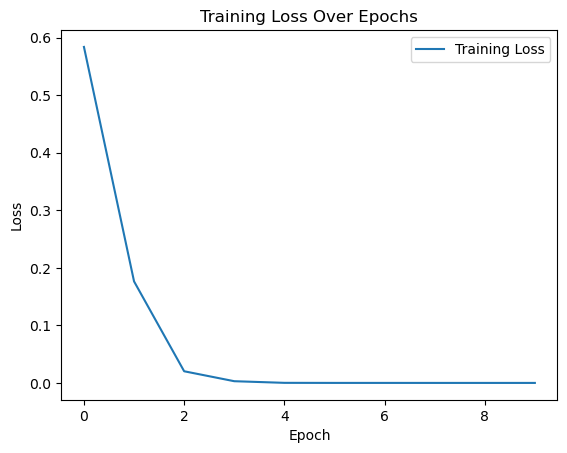

In [14]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

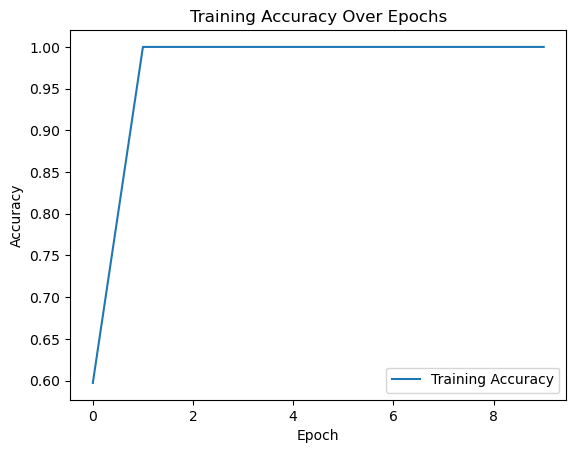

In [15]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()
